In [104]:
# Load and clean data
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Read the file
column_names = ['sequence_name', 'tag_identificator', 'timestamp', 'date', 'x-coordinate', 'y-coordinate', 'z-coordinate', 'activity']
data_act = pd.read_csv('ConfLongDemo_JSI.txt',sep=',',header=None, names=column_names)

# Makes the data easier to understand. Replace name of tag_idintificator
data_act = data_act.replace(to_replace= '010-000-024-033', value='ankle_left')
data_act = data_act.replace(to_replace= '010-000-030-096', value='ankle_right')
data_act = data_act.replace(to_replace= '020-000-033-111', value='chest')
data_act = data_act.replace(to_replace= '020-000-032-221', value='belt')

# Convert date to a pandas datetime object 
data_act['date'] = pd.to_datetime(data_act['date'], format='%d.%m.%Y %H:%M:%S:%f')


In [105]:
# Split data into 4 different models based on tag
data_act_belt = data_act[data_act['tag_identificator'].isin(['belt'])]
data_act_chest = data_act[data_act['tag_identificator'].isin(['chest'])]
data_act_anrig = data_act[data_act['tag_identificator'].isin(['ankle_right'])]
data_act_anlef = data_act[data_act['tag_identificator'].isin(['ankle_left'])]

In [44]:
# We split the data using whole groups of sequences (A01+A02+---A05, B01+....+B05 etc).
# The next two lines were used to single out a sequence
random.seed(55)
print(random.randint(1, 5))
# The number one correlates with the letter A.
data_act['sequence_name'].unique()


1


array(['A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'B02', 'B03', 'B04',
       'B05', 'C01', 'C02', 'C03', 'C04', 'C05', 'D01', 'D02', 'D03',
       'D04', 'D05', 'E01', 'E02', 'E03', 'E04', 'E05'], dtype=object)

In [127]:
# Split into training and test set

from sklearn.model_selection import train_test_split
import numpy as np
import random

# We split our data based on the results from the cell above. All A01-A05 sequences are selected. 
# Roughly 20% of our data.
train_data_act_chest = data_act_chest[data_act_chest['sequence_name'].isin(['B01', 'B02', 'B03', 'B04',
       'B05', 'C01', 'C02', 'C03', 'C04', 'C05', 'D01', 'D02', 'D03',
       'D04', 'D05', 'E01', 'E02', 'E03', 'E04', 'E05'])]
test_data_act_chest = data_act_chest[data_act_chest['sequence_name'].isin(['A01', 'A02', 'A03', 'A04', 'A05'])]





y_chest_train = train_data_act_chest['activity'] 
X_chest_train = train_data_act_chest

y_chest_test = test_data_act_chest['activity'] 
X_chest_test = test_data_act_chest


# X_chest_train = X_chest_train[~X_chest_train.sequence_name.str.contains('|'.join(['B']))] # https://www.geeksforgeeks.org/how-to-drop-rows-that-contain-a-specific-string-in-pandas/


'''# Drop unnecessary data for X
column_list = ['sequence_name', 'tag_identificator', 'timestamp', 'date', 'activity']
for element in column_list:
    X_chest_train = X_chest_train.drop(element, axis=1)
    X_chest_test = X_chest_test.drop(element, axis=1)
    '''
    
'''display(y_chest_train)
display(X_chest_train)
display(y_chest_test)
display(X_chest_test)'''



27476     walking
27479     walking
27483     walking
27486     walking
27490     walking
           ...   
164844    walking
164847    walking
164851    walking
164853    walking
164857    walking
Name: activity, Length: 28235, dtype: object

,sequence_name,tag_identificator,timestamp,date,x-coordinate,y-coordinate,z-coordinate,activity
27476,B01,chest,633790199776053696,2009-05-27 13:19:37.607,1.365607,1.314459,1.313827,walking
27479,B01,chest,633790199777134868,2009-05-27 13:19:37.713,1.504908,1.580030,1.211669,walking
27483,B01,chest,633790199778216047,2009-05-27 13:19:37.820,1.385840,1.292108,1.305492,walking
27486,B01,chest,633790199779297211,2009-05-27 13:19:37.930,1.349231,1.274304,1.262195,walking
27490,B01,chest,633790199780378382,2009-05-27 13:19:38.037,1.382352,1.337006,1.333108,walking
...,...,...,...,...,...,...,...,...
164844,E05,chest,633790146415770256,2009-05-27 11:50:41.577,3.008787,1.746822,1.256466,walking
164847,E05,chest,633790146416851433,2009-05-27 11:50:41.687,3.144385,1.942656,1.278216,walking
164851,E05,chest,633790146417932614,2009-05-27 11:50:41.793,3.167455,1.958027,1.319926,walking
164853,E05,chest,633790146419013787,2009-05-27 11:50:41.900,3.092084,1.956317,1.494364,walking


1        walking
5        walking
8        walking
11       walking
17       walking
          ...   
27446    walking
27450    walking
27457    walking
27464    walking
27471    walking
Name: activity, Length: 7566, dtype: object

,sequence_name,tag_identificator,timestamp,date,x-coordinate,y-coordinate,z-coordinate,activity
1,A01,chest,633790226051820913,2009-05-27 14:03:25.183,4.291954,1.781140,1.344495,walking
5,A01,chest,633790226052902087,2009-05-27 14:03:25.290,4.364077,1.767691,1.299996,walking
8,A01,chest,633790226053983265,2009-05-27 14:03:25.397,4.244914,1.981682,1.308759,walking
11,A01,chest,633790226055064446,2009-05-27 14:03:25.507,4.126309,2.165541,1.378844,walking
17,A01,chest,633790226057226795,2009-05-27 14:03:25.723,4.292501,2.073853,1.366508,walking
...,...,...,...,...,...,...,...,...
27446,A05,chest,633790243626968335,2009-05-27 14:32:42.697,3.706836,1.899103,1.310527,walking
27450,A05,chest,633790243629130672,2009-05-27 14:32:42.913,3.848527,1.935923,1.370462,walking
27457,A05,chest,633790243631293031,2009-05-27 14:32:43.130,3.807778,1.954632,1.363962,walking
27464,A05,chest,633790243633455390,2009-05-27 14:32:43.347,3.994074,2.227117,1.460805,walking


/Users/alakazam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/alakazam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

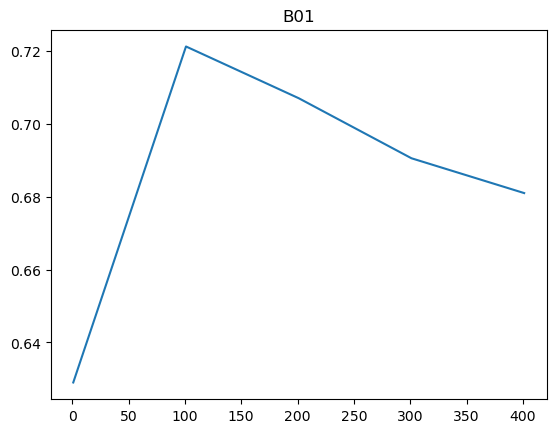

[0.6290228987189216, 0.721198053832076, 0.7070035263134402, 0.6905325179663437, 0.6809802258626076]
B02  Best K is:  101  has value:  0.721198053832076


/Users/alakazam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/alakazam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

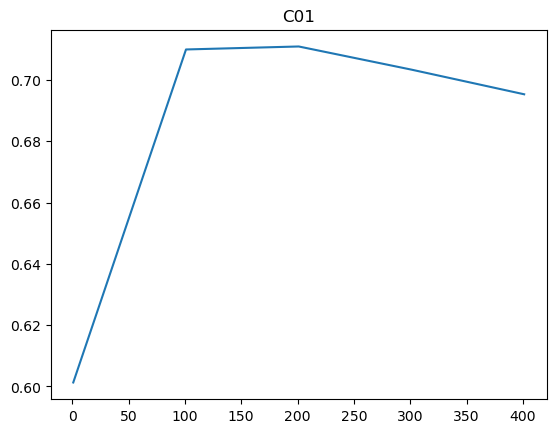

[0.6013059156027678, 0.7099210603255043, 0.7108956242081669, 0.7033427541175324, 0.6953026020855667]
C02  Best K is:  201  has value:  0.7108956242081669


/Users/alakazam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/alakazam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

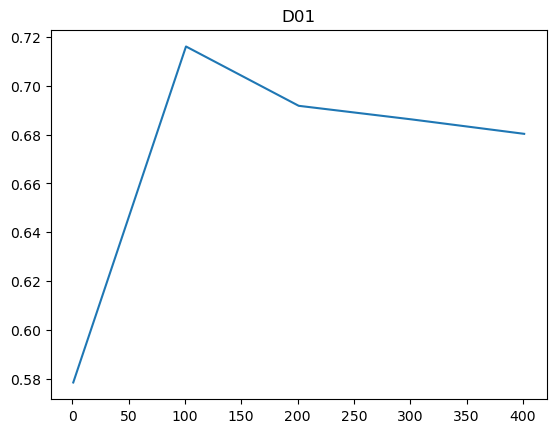

[0.5784159333024549, 0.7161185734136174, 0.6918017600741084, 0.686243631310792, 0.6803149606299213]
D02  Best K is:  101  has value:  0.7161185734136174


/Users/alakazam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/alakazam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

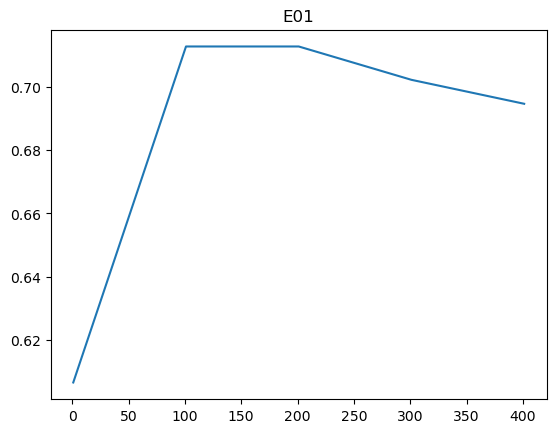

[0.6065378900445765, 0.7128281327389797, 0.7128281327389797, 0.7022783556215948, 0.6947003467062902]
E02  Best K is:  101  has value:  0.7128281327389797


In [128]:
# Selecting parameters using cross validation
# Each function takes training, traines and testes and presents the accuracy. If we can feed it 
# If it can take the whole training set AND the sequences that should be used for test that would be great.
# It should return a print.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

#sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)[source]

def accuracy_tester(training_data_frame, list_of_validation_sequences, k_value):
    '''Test accuracy for one validation sequence (A1-5 etc) and one k value. Returns an accuracy number.'''
    # Duplicate data frame
    #training_data_frame = training_data_frame_in.copy(deep=True)
    # We split the data with test and training. 
    train_data_act_chest = training_data_frame[training_data_frame['sequence_name'].isin(list_of_validation_sequences)]
    test_data_act_chest = training_data_frame[~training_data_frame.sequence_name.str.contains('|'.join(list_of_validation_sequences))]
    
    y_chest_train = train_data_act_chest['activity'] 
    X_chest_train = train_data_act_chest

    y_chest_test = test_data_act_chest['activity'] 
    X_chest_test = test_data_act_chest


    # Drop unnecessary data for X
    column_list = ['sequence_name', 'tag_identificator', 'timestamp', 'date', 'activity']
    for element in column_list:
        X_chest_train = X_chest_train.drop(element, axis=1)
        X_chest_test = X_chest_test.drop(element, axis=1)
        
    # fit model
    knn = KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(X_chest_train, y_chest_train)
    
    # Return accuracy
    predictions = knn.predict(X_chest_test)
    return accuracy_score(y_chest_test, predictions)  

def accuracy_grapher_one_fold(X_chest_train, fold_list):
    '''Takes a data frame and a sequence and returns a graph '''
    list_of_accuracies = []
    k_values_to_test = np.arange(1, 500, 100).tolist()
    for k_value in k_values_to_test:
        list_of_accuracies.append(accuracy_tester(X_chest_train, fold_list, k_value))
    max_value = max(list_of_accuracies)
    plt.plot(k_values_to_test, list_of_accuracies)
    plt.title(fold_list[0])
    plt.show()
    print(list_of_accuracies)
    print(fold_list[1], ' Best K is: ', k_values_to_test[list_of_accuracies.index(max_value)], ' has value: ', max_value)
   
def plot_all_folds(X_chest_train):
    accuracy_grapher_one_fold(X_chest_train, ['B01', 'B02', 'B03', 'B04', 'B05'])
    accuracy_grapher_one_fold(X_chest_train, ['C01', 'C02', 'C03', 'C04', 'C05'])
    accuracy_grapher_one_fold(X_chest_train, ['D01', 'D02', 'D03', 'D04', 'D05'])
    accuracy_grapher_one_fold(X_chest_train, ['E01', 'E02', 'E03', 'E04', 'E05'])
 

    
plot_all_folds(X_chest_train)

# Best K-values are 85, 145, 145, 150

    

In [56]:
# Fit model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_chest_train, y_chest_train)


KNeighborsClassifier(n_neighbors=1)

/Users/alakazam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Test set predictions: ['lying down' 'walking' 'lying down' ... 'walking' 'walking' 'walking']
Test set labels: 27476     walking
27479     walking
27483     walking
27486     walking
27490     walking
           ...   
164844    walking
164847    walking
164851    walking
164853    walking
164857    walking
Name: activity, Length: 28235, dtype: object
[[ 121   77    0    1   35    8   37  101    1   19   85]
 [ 215 7106  352  438   26    5   73  702    0   63   11]
 [   3  279  191  100   69   10   10  329    2   21   77]
 [   5  174   54  338   63    4   29   98    4   66    7]
 [  87  164  268   20 2410  242   44  269  111   20  897]
 [   9   10   22    8   79   16    3   28   10   18   90]
 [ 137  178    0    9   58   35  692  414    0  533    7]
 [ 146  709  396  150  167   11  138 1151    1  144  272]
 [   1    4   16    2   43   12    2   30    3   30   89]
 [  16    4    2    4   22    4  136   88    7  168   65]
 [ 143   75  539    1  247   86    7  341   40   31 4395]]


/Users/alakazam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


                                        precision    recall  f1-score   support

                               falling       0.14      0.25      0.18       485
                                 lying       0.81      0.79      0.80      8991
                            lying down       0.10      0.18      0.13      1091
                          on all fours       0.32      0.40      0.35       842
                               sitting       0.75      0.53      0.62      4532
                          sitting down       0.04      0.05      0.04       293
                 sitting on the ground       0.59      0.34      0.43      2063
                standing up from lying       0.32      0.35      0.34      3285
              standing up from sitting       0.02      0.01      0.01       232
standing up from sitting on the ground       0.15      0.33      0.21       516
                               walking       0.73      0.74      0.74      5905

                              accuracy

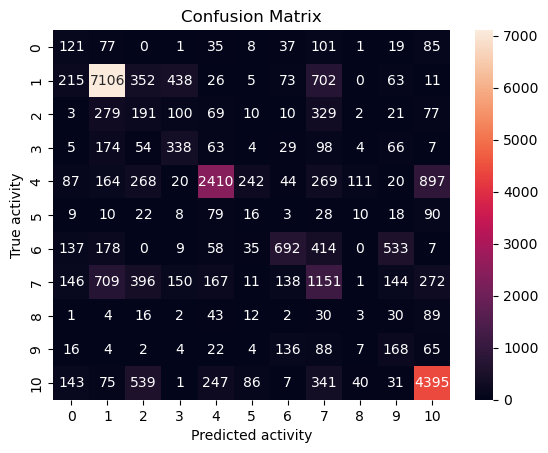

In [58]:
import seaborn as sns

# Evluation
predictions = knn.predict(X_chest_test)
print("Test set predictions:", predictions)
print("Test set labels:", y_chest_test)
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_chest_test, predictions)
print(confusion)
from sklearn.metrics import classification_report
print(classification_report(y_chest_test, knn.predict(X_chest_test)))


sns.heatmap(confusion, annot=True, fmt='d', xticklabels=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted activity')
plt.ylabel('True activity')
plt.show()